In [ ]:
pip install numpy
pip install pandas

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/AllCases_AvgSummary.csv')

In [ ]:
df.head()

,Case,Distance_mm,Mean_ADC
0,South_YesShield,10,87.739927
1,South_YesShield,15,104.930736
2,South_YesShield,20,1159.847153
3,South_YesShield,25,1721.057942
4,South_YesShield,30,1890.846820


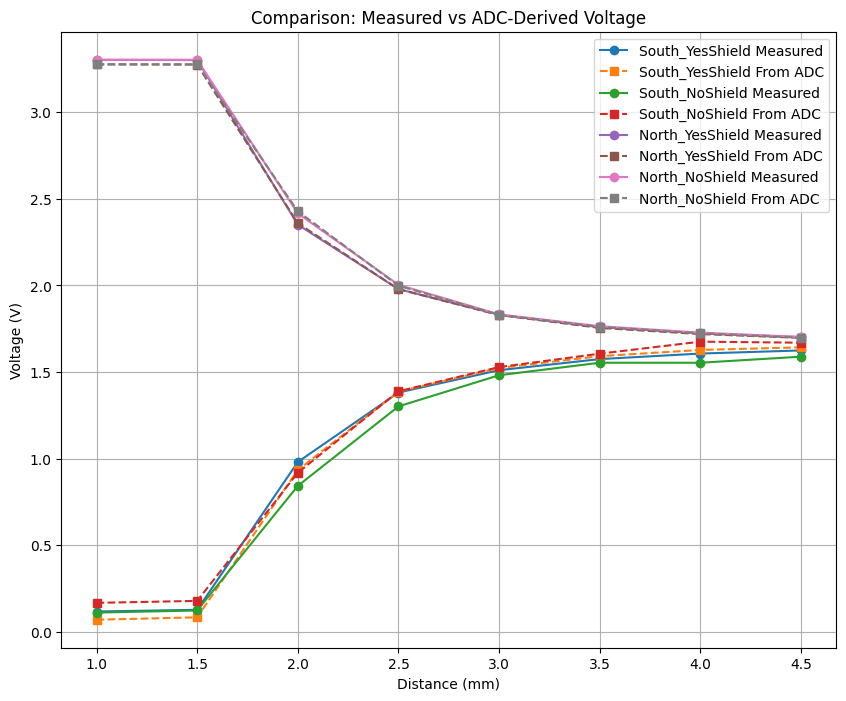

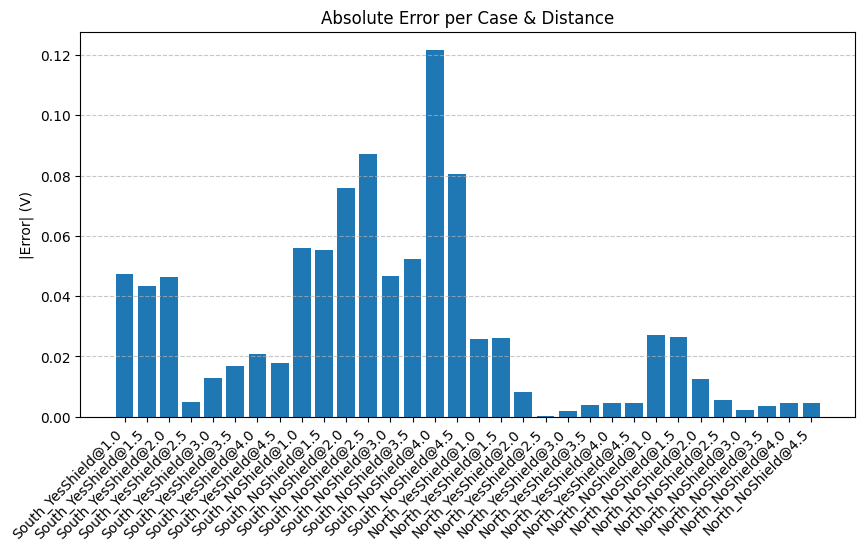

Overall average |error| = 0.0296 V
✅ Saved comparison results to Compare_ADC_vs_Measured.csv


In [ ]:
# === Install dependencies (if not already installed) ===
import pandas as pd
import matplotlib.pyplot as plt

# ====== Step 1: Input data ======
# Mean ADC summary from Simulink
data_adc = {
    "Case": [
        "South_YesShield","South_YesShield","South_YesShield","South_YesShield","South_YesShield","South_YesShield","South_YesShield","South_YesShield",
        "South_NoShield","South_NoShield","South_NoShield","South_NoShield","South_NoShield","South_NoShield","South_NoShield","South_NoShield",
        "North_YesShield","North_YesShield","North_YesShield","North_YesShield","North_YesShield","North_YesShield","North_YesShield","North_YesShield",
        "North_NoShield","North_NoShield","North_NoShield","North_NoShield","North_NoShield","North_NoShield","North_NoShield","North_NoShield"
    ],
    "Distance_mm": [
        10,15,20,25,30,35,40,45,
        10,15,20,25,30,35,40,45,
        10,15,20,25,30,35,40,45,
        10,15,20,25,30,35,40,45
    ],
    "Mean_ADC": [
        87.7399,104.9307,1159.8471,1721.0579,1890.8468,1975.4079,2020.1052,2038.6427,
        208.5528,222.6577,1140.2561,1723.9707,1897.1512,1993.2994,2079.3187,2071.7792,
        4065.5741,4063.9700,2927.4878,2455.4249,2269.8435,2177.8215,2133.7915,2106.4835,
        4065.1159,4065.7982,3013.4093,2479.8961,2271.8635,2185.6267,2138.8468,2107.5495
    ]
}
df_adc = pd.DataFrame(data_adc)

# ====== Step 2: Convert ADC → Voltage ======
Vref = 3.3
Nbit = 12
df_adc["Vout_ADC"] = (df_adc["Mean_ADC"] / (2**Nbit - 1)) * Vref

# ====== Step 3: Measured Vout table ======
data_meas = {
    "Distance_mm": [1,1.5,2,2.5,3,3.5,4,4.5],
    "North_YesShield": [3.302,3.301,2.351,1.979,1.831,1.759,1.724,1.702],
    "North_NoShield":  [3.303,3.303,2.416,2.004,1.833,1.765,1.728,1.703],
    "South_YesShield": [0.118,0.128,0.981,1.382,1.511,1.575,1.607,1.625],
    "South_NoShield":  [0.112,0.124,0.843,1.302,1.482,1.554,1.554,1.589]
}
df_meas = pd.DataFrame(data_meas)

# ====== Step 4: Merge by matching "case" & "distance" ======
# Map case names to measured columns
case_map = {
    "North_YesShield": "North_YesShield",
    "North_NoShield": "North_NoShield",
    "South_YesShield": "South_YesShield",
    "South_NoShield": "South_NoShield"
}

# Scale distance (10,15,...45) → (1,1.5,...4.5)
df_adc["Distance_mm"] = df_adc["Distance_mm"] / 10

records = []
for _, row in df_adc.iterrows():
    case = row["Case"]
    dist = row["Distance_mm"]
    if case not in case_map:
        continue
    v_true = df_meas.loc[df_meas["Distance_mm"] == dist, case_map[case]].values
    if len(v_true) == 0:
        continue
    v_true = v_true[0]
    records.append({
        "Case": case,
        "Distance_mm": dist,
        "Vout_ADC": row["Vout_ADC"],
        "Vout_True": v_true,
        "Error_V": row["Vout_ADC"] - v_true,
        "AbsError_V": abs(row["Vout_ADC"] - v_true)
    })

df_compare = pd.DataFrame(records)
df_compare.head()

# ====== Step 5: Plot Comparison ======
plt.figure(figsize=(10,8))
cases = df_compare["Case"].unique()
for case in cases:
    subset = df_compare[df_compare["Case"] == case]
    plt.plot(subset["Distance_mm"], subset["Vout_True"], 'o-', label=f"{case} Measured")
    plt.plot(subset["Distance_mm"], subset["Vout_ADC"], 's--', label=f"{case} From ADC")

plt.xlabel("Distance (mm)")
plt.ylabel("Voltage (V)")
plt.title("Comparison: Measured vs ADC-Derived Voltage")
plt.grid(True)
plt.legend()
plt.show()

# ====== Step 6: Plot Absolute Error ======
plt.figure(figsize=(10,5))
plt.bar(df_compare["Case"] + "@" + df_compare["Distance_mm"].astype(str), df_compare["AbsError_V"])
plt.ylabel("|Error| (V)")
plt.title("Absolute Error per Case & Distance")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# ====== Step 7: Summary statistics ======
mean_abs_error = df_compare["AbsError_V"].mean()
print(f"Overall average |error| = {mean_abs_error:.4f} V")

# Optional: Save to CSV
df_compare.to_csv("Compare_ADC_vs_Measured.csv", index=False)
print("✅ Saved comparison results to Compare_ADC_vs_Measured.csv")


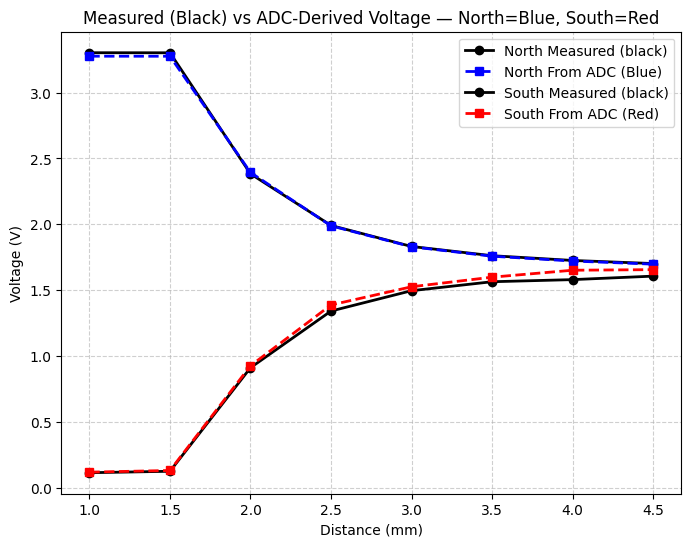

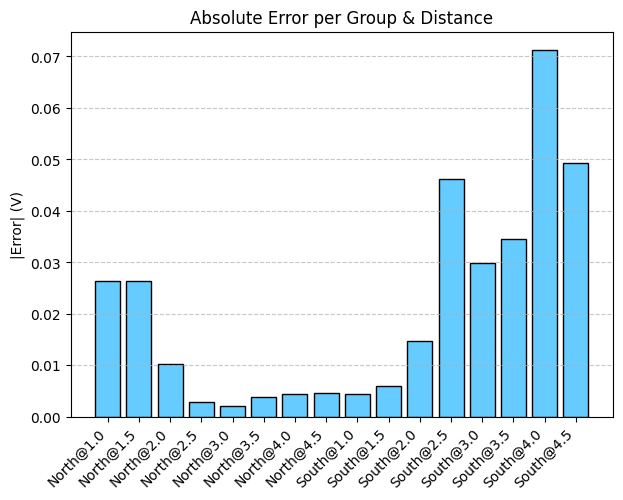

Overall average |error| = 0.0211 V
✅ Saved results to Compare_ADC_vs_Measured_NoShield.csv


In [ ]:
# === Install dependencies (if not already installed) ===
import pandas as pd
import matplotlib.pyplot as plt

# ====== Step 1: Input data ======
data_adc = {
    "Case": [
        "South_YesShield","South_YesShield","South_YesShield","South_YesShield","South_YesShield","South_YesShield","South_YesShield","South_YesShield",
        "South_NoShield","South_NoShield","South_NoShield","South_NoShield","South_NoShield","South_NoShield","South_NoShield","South_NoShield",
        "North_YesShield","North_YesShield","North_YesShield","North_YesShield","North_YesShield","North_YesShield","North_YesShield","North_YesShield",
        "North_NoShield","North_NoShield","North_NoShield","North_NoShield","North_NoShield","North_NoShield","North_NoShield","North_NoShield"
    ],
    "Distance_mm": [
        10,15,20,25,30,35,40,45,
        10,15,20,25,30,35,40,45,
        10,15,20,25,30,35,40,45,
        10,15,20,25,30,35,40,45
    ],
    "Mean_ADC": [
        87.7399,104.9307,1159.8471,1721.0579,1890.8468,1975.4079,2020.1052,2038.6427,
        208.5528,222.6577,1140.2561,1723.9707,1897.1512,1993.2994,2079.3187,2071.7792,
        4065.5741,4063.9700,2927.4878,2455.4249,2269.8435,2177.8215,2133.7915,2106.4835,
        4065.1159,4065.7982,3013.4093,2479.8961,2271.8635,2185.6267,2138.8468,2107.5495
    ]
}
df_adc = pd.DataFrame(data_adc)

# ====== Step 2: Convert ADC → Voltage ======
Vref = 3.3
Nbit = 12
df_adc["Vout_ADC"] = (df_adc["Mean_ADC"] / (2**Nbit - 1)) * Vref
df_adc["Distance_mm"] = df_adc["Distance_mm"] / 10

# ====== Step 3: Measured data ======
data_meas = {
    "Distance_mm": [1,1.5,2,2.5,3,3.5,4,4.5],
    "North_YesShield": [3.302,3.301,2.351,1.979,1.831,1.759,1.724,1.702],
    "North_NoShield":  [3.303,3.303,2.416,2.004,1.833,1.765,1.728,1.703],
    "South_YesShield": [0.118,0.128,0.981,1.382,1.511,1.575,1.607,1.625],
    "South_NoShield":  [0.112,0.124,0.843,1.302,1.482,1.554,1.554,1.589]
}
df_meas = pd.DataFrame(data_meas)

# ====== Step 4: Merge & average North/South (ignore Shield) ======
df_adc["Group"] = df_adc["Case"].apply(lambda x: "North" if "North" in x else "South")

# --- Combine ADC mean per group ---
df_adc_group = df_adc.groupby(["Group","Distance_mm"], as_index=False).agg({"Vout_ADC":"mean"})

# --- Combine measured mean per group ---
df_meas["North"] = df_meas[["North_YesShield","North_NoShield"]].mean(axis=1)
df_meas["South"] = df_meas[["South_YesShield","South_NoShield"]].mean(axis=1)

# --- Merge measured with ADC per group ---
records = []
for grp in ["North","South"]:
    for dist in df_meas["Distance_mm"]:
        v_true = df_meas.loc[df_meas["Distance_mm"]==dist, grp].values[0]
        v_adc = df_adc_group.loc[(df_adc_group["Group"]==grp) & (df_adc_group["Distance_mm"]==dist), "Vout_ADC"].values
        if len(v_adc)==0:
            continue
        v_adc = v_adc[0]
        records.append({
            "Group": grp,
            "Distance_mm": dist,
            "Vout_True": v_true,
            "Vout_ADC": v_adc,
            "Error_V": v_adc - v_true,
            "AbsError_V": abs(v_adc - v_true)
        })
df_compare = pd.DataFrame(records)

# ====== Step 5: Plot Comparison ======
plt.figure(figsize=(8,6))
style_true = {'color':'black','marker':'o','linestyle':'-','linewidth':2}
style_adc  = {'marker':'s','linestyle':'--','linewidth':2}

for grp, color in zip(["North","South"], ["#0000FF","#FF0000"]):  # Blue / Red
    sub = df_compare[df_compare["Group"]==grp]
    plt.plot(sub["Distance_mm"], sub["Vout_True"], **style_true, label=f"{grp} Measured (black)")
    plt.plot(sub["Distance_mm"], sub["Vout_ADC"], color=color, **style_adc, label=f"{grp} From ADC ({'Blue' if grp=='North' else 'Red'})")

plt.xlabel("Distance (mm)")
plt.ylabel("Voltage (V)")
plt.title("Measured (Black) vs ADC-Derived Voltage — North=Blue, South=Red")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# ====== Step 6: Plot Absolute Error ======
plt.figure(figsize=(7,5))
plt.bar(df_compare["Group"] + "@" + df_compare["Distance_mm"].astype(str),
        df_compare["AbsError_V"], color="#66CCFF", edgecolor="black")
plt.ylabel("|Error| (V)")
plt.title("Absolute Error per Group & Distance")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# ====== Step 7: Summary ======
mean_abs_error = df_compare["AbsError_V"].mean()
print(f"Overall average |error| = {mean_abs_error:.4f} V")

df_compare.to_csv("Compare_ADC_vs_Measured_NoShield.csv", index=False)
print("✅ Saved results to Compare_ADC_vs_Measured_NoShield.csv")
